In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import Dense

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
plt.style.use("ggplot")

In [2]:
df = pd.read_csv("C:/Users/pedro.martins/OneDrive - Kestraa/25 do 12/Python Scripts/Machine Learning/Dados/Breast Cancer Prediction.csv")
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
df.drop(columns= "Sample code number", inplace= True)

In [4]:
df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [5]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Plots

<AxesSubplot:>

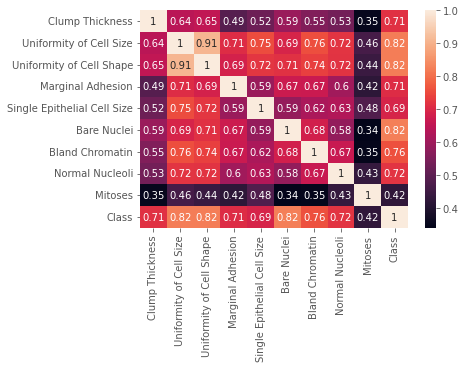

In [6]:
sns.heatmap(df.corr(), annot= True, vmax= 1)

C:\Users\pedro.martins\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pedro.martins\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pedro.martins\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

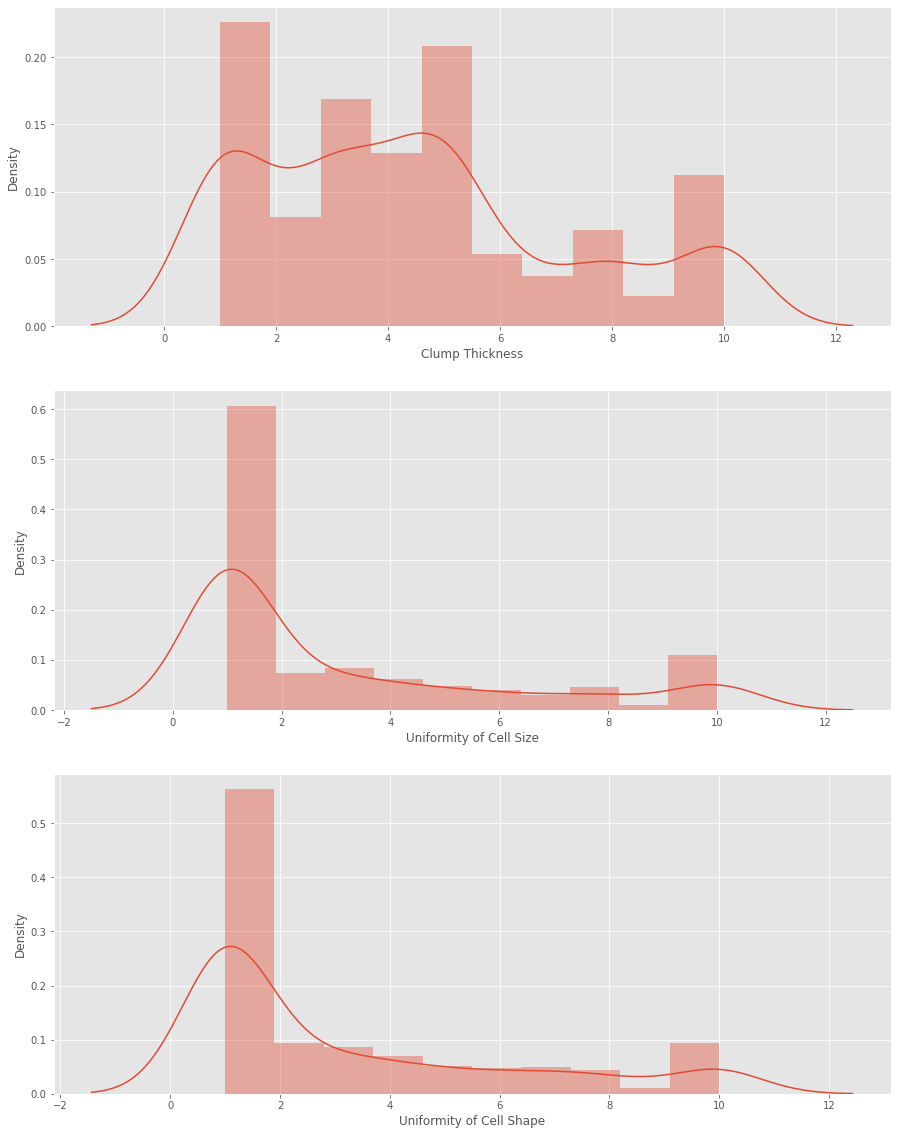

In [7]:
fig, ax1 = plt.subplots(3, figsize=(15,20))
columns = list(df.drop(columns= ['Class']).columns)
k = 0

for i in range(3):          
        sns.distplot(df[columns[k]], ax = ax1[i])
        k += 1

C:\Users\pedro.martins\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pedro.martins\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pedro.martins\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

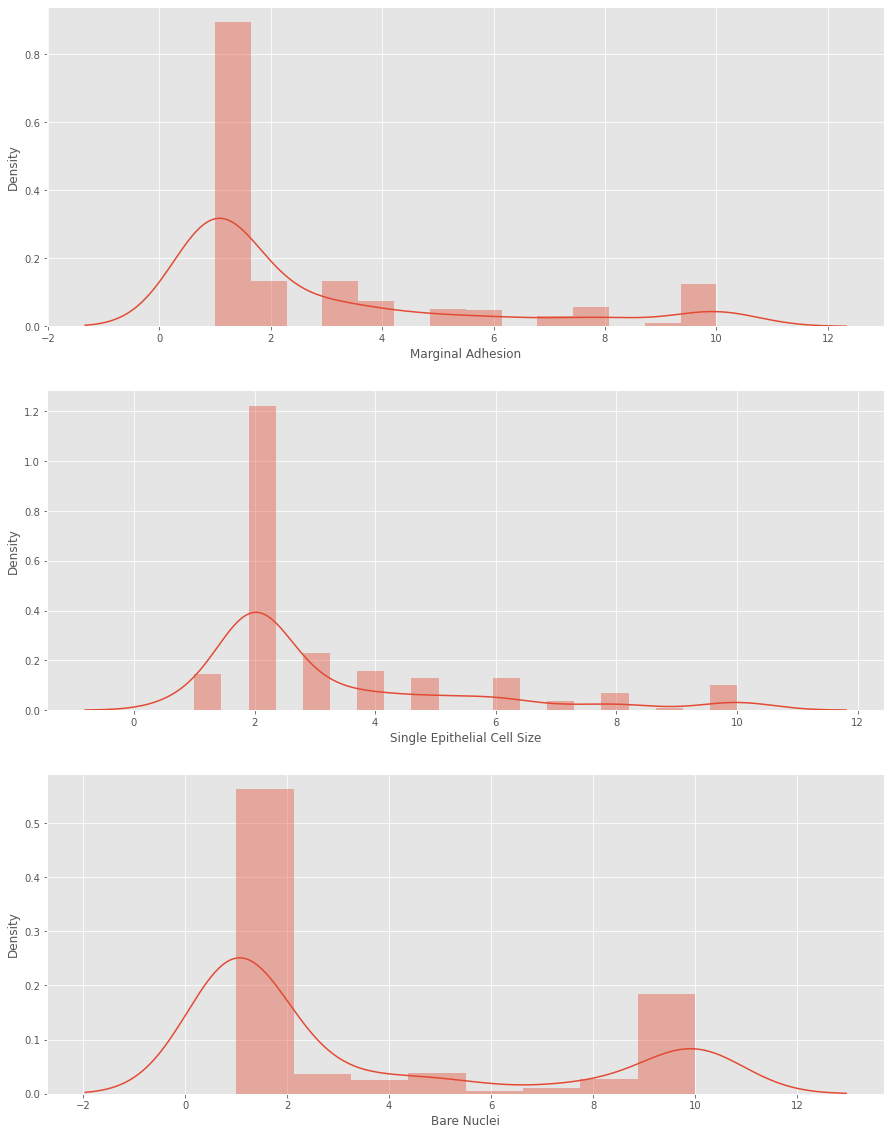

In [8]:
fig, ax = plt.subplots(3, figsize=(15,20))

for i in range(3):             
        sns.distplot(df[columns[k]], ax = ax[i])
        k += 1

C:\Users\pedro.martins\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pedro.martins\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pedro.martins\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

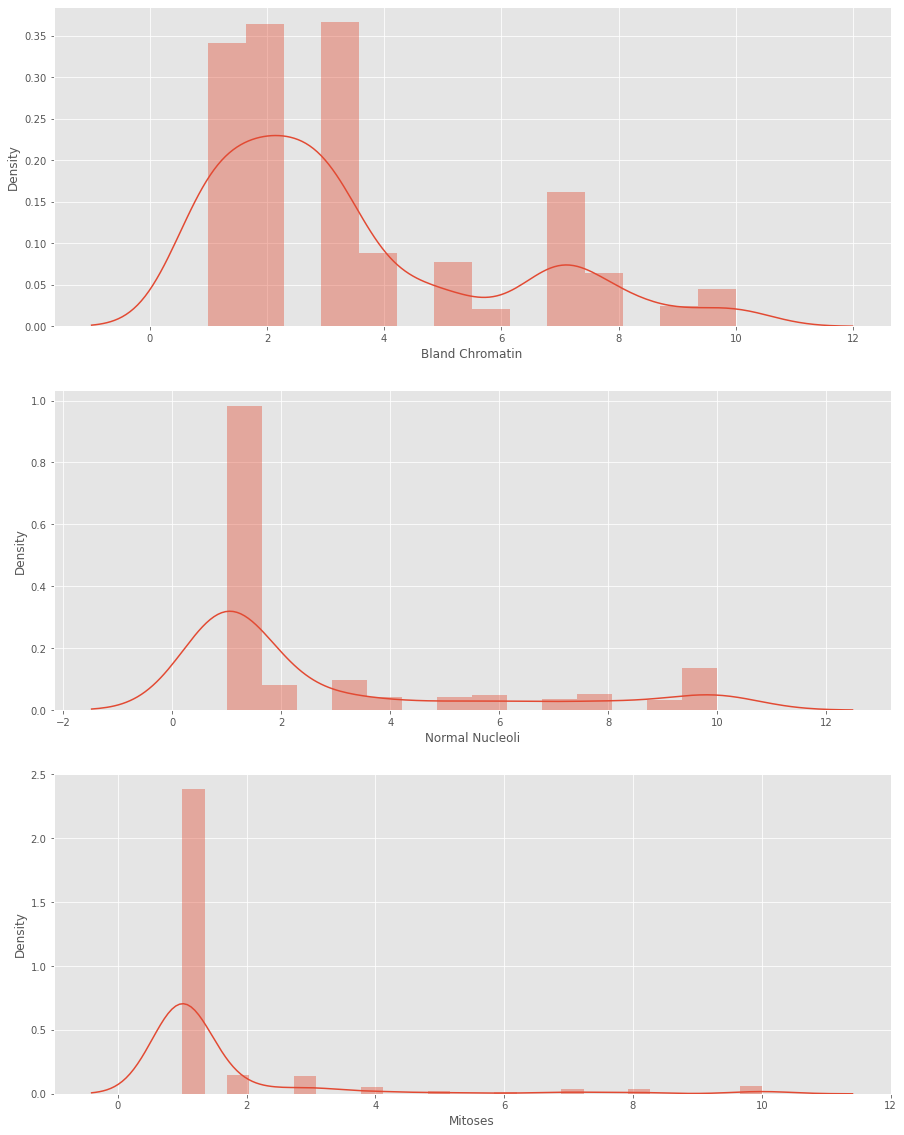

In [9]:
fig, ax4 = plt.subplots(3, figsize=(15,20))

for i in range(3):             
        sns.distplot(df[columns[k]], ax = ax4[i])
        k += 1

# Model's

In [10]:
previsores = df.drop(columns="Class").values
classe = df["Class"].values

In [11]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [12]:
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)
previsoes = floresta.predict(X_teste)

print(f"Modelo - RandomForestClassifier \nMatriz confusão: \n{confusion_matrix(y_teste, previsoes)}")
print(f"\nAcc: {accuracy_score(y_teste, previsoes)}")

Modelo - RandomForestClassifier 
Matriz confusão: 
[[126   4]
 [  4  71]]

Acc: 0.9609756097560975


In [13]:
nb = GaussianNB()
nb.fit(X_treinamento, y_treinamento)
previsoes = nb.predict(X_teste)

print(f"Modelo - GaussianNB \nMatriz confusão: \n{confusion_matrix(y_teste, previsoes)}")
print(f"\nAcc: {accuracy_score(y_teste, previsoes)}")

Modelo - GaussianNB 
Matriz confusão: 
[[121   9]
 [  2  73]]

Acc: 0.9463414634146341


In [14]:
neighbors = KNeighborsClassifier(n_neighbors=3)
neighbors.fit(X_treinamento, y_treinamento)
previsoes = neighbors.predict(X_teste)

print(f"Modelo - KNeighborsClassifier \nMatriz confusão: \n{confusion_matrix(y_teste, previsoes)}")
print(f"\nAcc: {accuracy_score(y_teste, previsoes)}")

Modelo - KNeighborsClassifier 
Matriz confusão: 
[[127   3]
 [  4  71]]

Acc: 0.9658536585365853


In [15]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_treinamento, y_treinamento)
previsoes = tree.predict(X_teste)

print(f"Modelo - DecisionTreeClassifier \nMatriz confusão: \n{confusion_matrix(y_teste, previsoes)}")
print(f"\nAcc: {accuracy_score(y_teste, previsoes)}")

Modelo - DecisionTreeClassifier 
Matriz confusão: 
[[126   4]
 [  7  68]]

Acc: 0.9463414634146341
